In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
import geopandas as gpd

In [2]:
df = pd.read_csv('../data/mag/airdna.csv')

In [3]:
df.columns

Index(['geoid', 'short_term_unit', 'short_term_rate', 'min_rate', 'max_rate',
       'median', 'median_month', 'rent_units', 'pct', 'per_cap'],
      dtype='object')

## Map supply, price, and pct of total rental units

In [4]:
# allow max rows and colums to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
geo = gpd.read_file('../data/geo/shapefiles/PUMAS.geojson')
#geo.head(2)

In [6]:
phx = gpd.read_file('../data/geo/shapefiles/phx.geojson')
villages = gpd.read_file('../data/geo/shapefiles/Villages.shp')
villages = villages.to_crs(4269)
road = gpd.read_file('../data/geo/shapefiles/maricopa_primroads.geojson')
road = road.to_crs(4269)
mask = gpd.read_file('../data/geo/shapefiles/PUMAS_mask.geojson')

### join data to geo files

In [7]:
df = pd.merge(geo,df,how='left',left_on='joinid',right_on='geoid')

In [8]:
df.head(2)

,STATEFP20,PUMACE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,joinid,geometry,geoid,short_term_unit,short_term_rate,min_rate,max_rate,median,median_month,rent_units,pct,per_cap
0,04,00129,0400129,Phoenix (Far North) & Peoria (Northwest) Citie...,G6120,S,654040399,3894959,+33.8457815,-112.1641828,400129,"MULTIPOLYGON (((-112.04763 33.71469, -112.0475...",400129,471,391,25,5445,203.0,6090,9337,0.05,50
1,04,00112,0400112,"Maricopa County--Scottsdale (North), Phoenix (...",G6120,S,608391353,434248,+33.7670066,-111.9328706,400112,"MULTIPOLYGON (((-111.78744 33.68347, -111.7874...",400112,1557,1333,0,11457,320.0,9600,12218,0.13,127


In [9]:
df.describe()

,ALAND20,AWATER20,joinid,geoid,short_term_unit,short_term_rate,min_rate,max_rate,median,median_month,rent_units,pct,per_cap
count,1.500000e+01,1.500000e+01,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.500315e+08,4.751324e+05,400119.466667,400119.466667,745.000000,584.066667,28.200000,5762.000000,178.100000,5343.000000,16926.333333,0.046000,45.800000
std,1.990223e+08,9.764382e+05,5.235411,5.235411,708.236643,558.641396,19.045809,4971.744247,61.979893,1859.396792,7181.042221,0.048815,47.925836
min,3.348861e+07,2.684700e+04,400112.000000,400112.000000,32.000000,26.000000,0.000000,1000.000000,110.000000,3300.000000,9337.000000,0.000000,2.000000
25%,5.061796e+07,7.029600e+04,400115.500000,400115.500000,258.500000,195.000000,15.000000,2566.500000,140.500000,4215.000000,12257.000000,0.015000,15.000000
50%,7.508780e+07,1.879480e+05,400119.000000,400119.000000,471.000000,391.000000,27.000000,4964.000000,158.000000,4740.000000,14329.000000,0.030000,31.000000
75%,1.181456e+08,3.115855e+05,400122.500000,400122.500000,1185.000000,926.000000,39.500000,6149.000000,199.500000,5985.000000,19985.500000,0.050000,52.000000
max,6.540404e+08,3.894959e+06,400129.000000,400129.000000,2239.000000,1748.000000,62.000000,20000.000000,320.000000,9600.000000,34073.000000,0.180000,178.000000


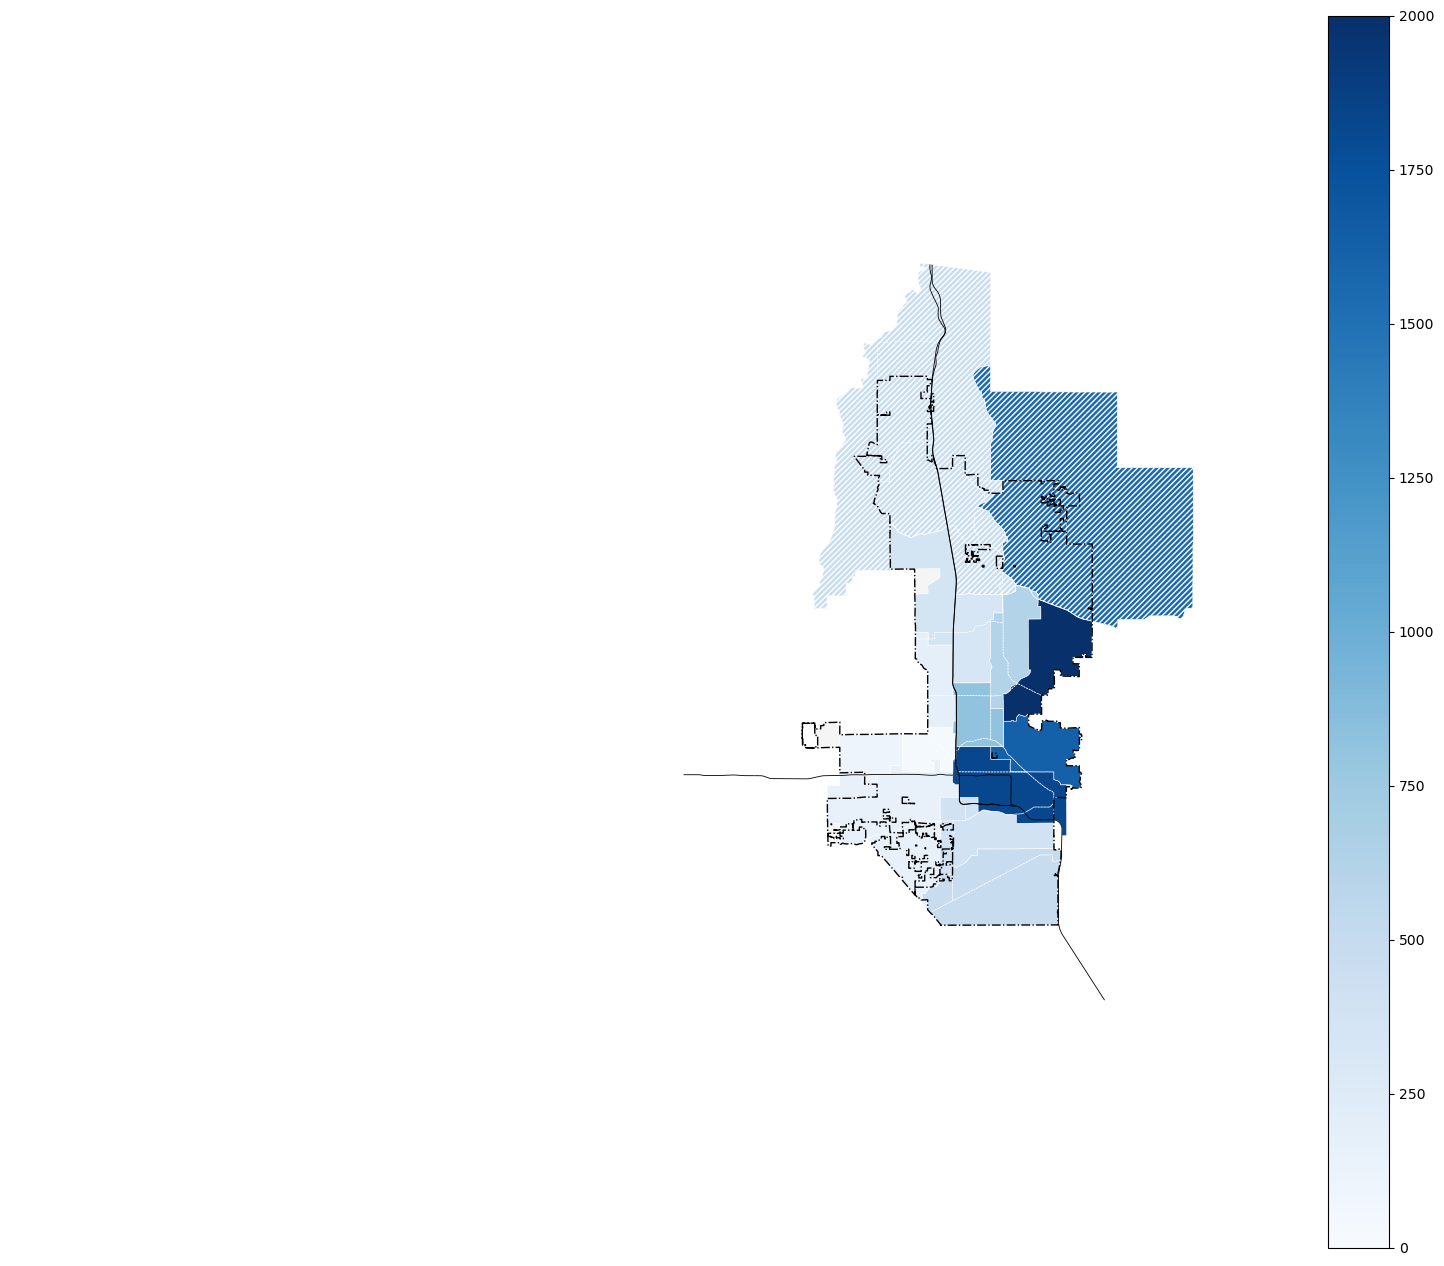

In [10]:
# short term unit counts
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=0,vmax=2000)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=new_norm)
sm.set_array([])
phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
df.plot(column = f'short_term_unit', cmap='Blues', norm=new_norm, edgecolor="white", linewidth=0.4, ax=ax)
mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
fig.colorbar(sm)
plt.savefig(f'img/short_term_units_820.jpg', dpi = 300) # saving each plot

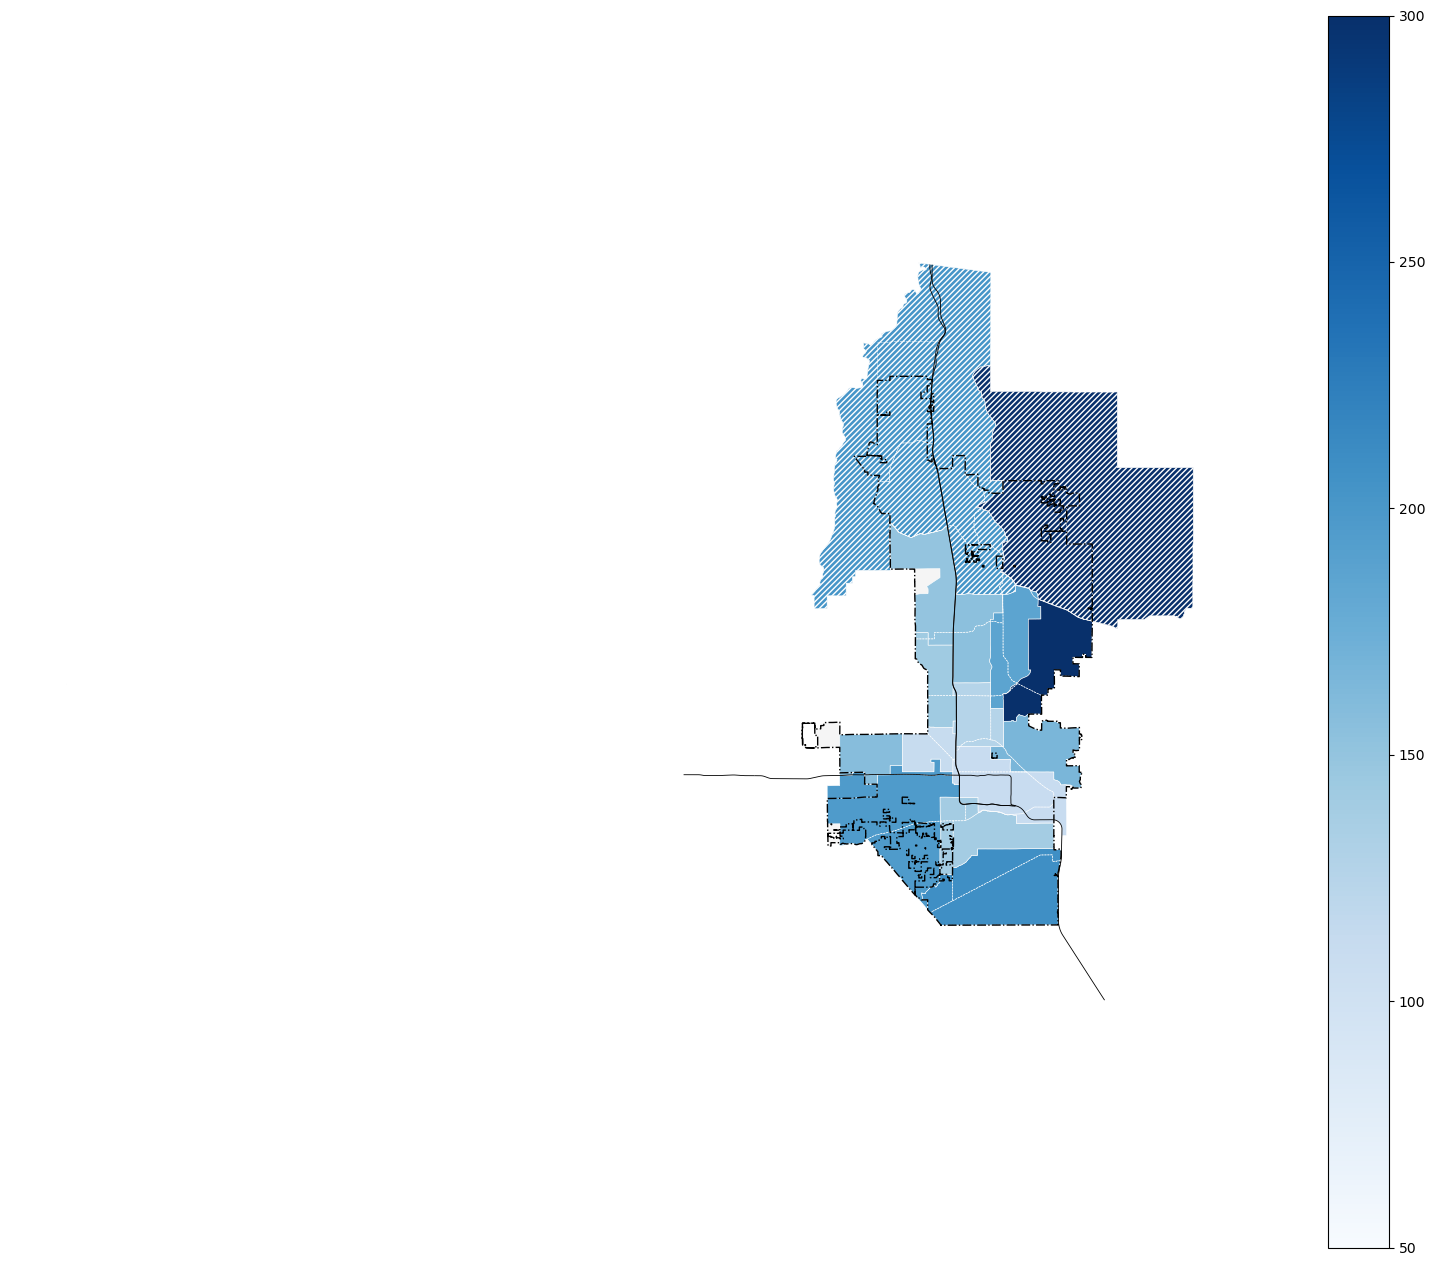

In [11]:
# short term unit median cost
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=50,vmax=300)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=new_norm)
sm.set_array([])
phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
df.plot(column = f'median', cmap='Blues', norm=new_norm, edgecolor="white", linewidth=0.4, ax=ax)
mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
fig.colorbar(sm)
plt.savefig(f'img/short_term_units_median_820.jpg', dpi = 300) # saving each plot

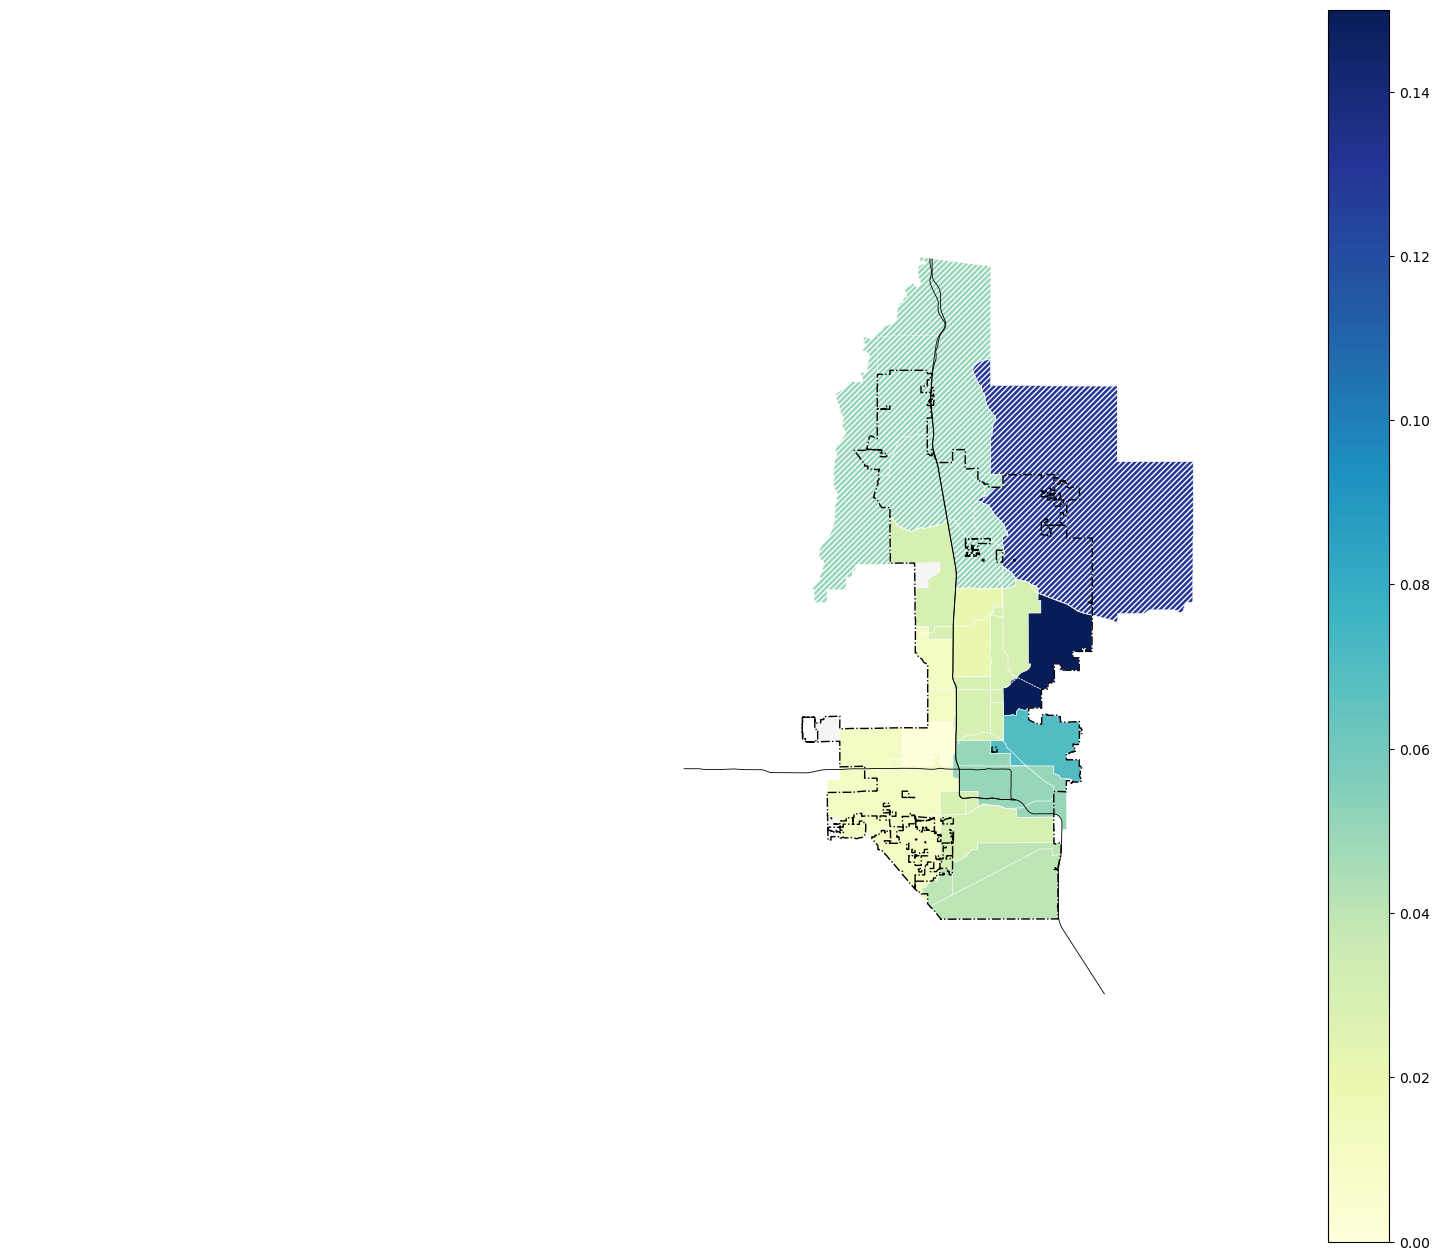

In [12]:
# short term unit counts as share of rental households
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=0,vmax=0.15)
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=new_norm)
sm.set_array([])
phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
df.plot(column = 'pct', cmap='YlGnBu', norm=new_norm, edgecolor="white", linewidth=0.4, ax=ax)
mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
fig.colorbar(sm)
plt.savefig(f'img/short_term_units_pct_820.jpg', dpi = 300) # saving each plot